In [1]:
import numpy as np
import pandas as pd
from pandas import Series, DataFrame

from datetime import datetime
from dateutil.parser import parse


# delta
# strftime - datetime obj formated as string
# strptime - convert strings to dates (pandas 'to_datetime')
# dateutil.parser
# use dates as index
# Slicing
# DF 
# Time Series with Duplicate Indices
# Create Date Ranges (normalize, period, freq)
# Periods
# Time Series Plotting


In [3]:
now=datetime.now()

In [6]:
print(now)
print(now.year)
print(now.month)
print(now.day)

2017-08-14 11:30:22.276000
2017
8
14


In [8]:
# delta represents the temporal difference between two datetime objects

delta=datetime(2011,1,7)-datetime.now();
delta

datetime.timedelta(-2412, 44798, 749000)

In [10]:
delta.days

-2412

In [15]:
delta.seconds

44798

In [16]:
delta_1 = datetime(2011, 1, 7) - datetime(2008, 6, 24, 8, 15)

In [17]:
delta_1

datetime.timedelta(926, 56700)

In [18]:
print(delta_1.days)
print(delta_1.seconds)

926
56700


In [50]:
# Converting between string and datetime:

stamp=datetime(2017, 8, 14, 23, 50, 33); # 23:50:33 sec
str(stamp)

'2017-08-14 23:50:33'

In [51]:
stamp.strftime('%Y-%m-%d')

'2017-08-14'

In [52]:
stamp.strftime('%y-%m-%d')

'17-08-14'

In [53]:
stamp.strftime('%H-%M-%S')

'23-50-33'

In [54]:
stamp.strftime('%I')

'11'

In [56]:
stamp.strftime('%w') # weekday as integer, Sunday as 0

'1'

In [ ]:
# %F Shortcut for %Y-%m-%d, for example 2012-4-18
# %D Shortcut for %m/%d/%y, for example 04/18/12

In [59]:
stamp.strftime('%A') # full weekday name

'Monday'

In [60]:
stamp.strftime('%a') # abbreviated day

'Mon'

In [62]:
stamp.strftime('%B') # full month name

'August'

In [63]:
stamp.strftime('%b')

'Aug'

In [65]:
stamp.strftime('%c') #full date and time

'08/14/17 23:50:33'

In [70]:
stamp.strftime('%x') # local appropriate date

'08/14/17'

In [69]:
stamp.strftime('%X')# local appropriate time

'23:50:33'

In [72]:
# convert strings to dates using datetime.strptime:

val='2017-08-14-23' # string

datetime.strptime(val, '%Y-%m-%d-%H') # date

datetime.datetime(2017, 8, 14, 23, 0)

In [82]:
# from srts to S or DF:

datestrs=['03/23/2011', '8/7/2012']

In [89]:
d=[datetime.strptime(x, '%m/%d/%Y') for x in datestrs]

# note: although the strs and the converter
# have format m-d-y the output has format y-m-d-h-min

In [90]:
d

[datetime.datetime(2011, 3, 23, 0, 0), datetime.datetime(2012, 8, 7, 0, 0)]

In [91]:
pd.Series(d)

0   2011-03-23
1   2012-08-07
dtype: datetime64[ns]

In [98]:
# faster way with pandas 'to_datetime' method:

d1=Series(pd.to_datetime(datestrs));  
d1

0   2011-03-23
1   2012-08-07
dtype: datetime64[ns]

In [92]:
from dateutil.parser import parse 

# for parsing bad formats
# caution: recognizes some strs as dates that you might not prefer
# e.g. '42' will be parsed as the year 2042 with today’s calendar date.

In [93]:
parse('2011-12-3')

datetime.datetime(2011, 12, 3, 0, 0)

In [94]:
parse('Jan 31, 1997 10:45 PM') # y-m-d-h-m

datetime.datetime(1997, 1, 31, 22, 45)

In [96]:
parse('Jan 31, 1997 10:45 PM', dayfirst=True) # dayfirst=True

datetime.datetime(1997, 1, 31, 22, 45)

In [95]:
parse('6/12/2011', dayfirst=True)

datetime.datetime(2011, 12, 6, 0, 0)

In [99]:
parse('42')

datetime.datetime(2042, 8, 14, 0, 0)

In [100]:
# use dates as index

dates = [datetime(2011, 1, 2), datetime(2011, 1, 5), 
         datetime(2011, 1, 7),datetime(2011, 1, 8), 
         datetime(2011, 1, 10), datetime(2011, 1, 12)]

In [102]:
ts=Series([2,4,3,5,6,1], index=dates)
ts

2011-01-02    2
2011-01-05    4
2011-01-07    3
2011-01-08    5
2011-01-10    6
2011-01-12    1
dtype: int64

In [112]:
ts2=Series([4,6,1,8,9,6], index=dates)
ts2

2011-01-02    4
2011-01-05    6
2011-01-07    1
2011-01-08    8
2011-01-10    9
2011-01-12    6
dtype: int64

In [113]:
ts + ts2

2011-01-02     6
2011-01-05    10
2011-01-07     4
2011-01-08    13
2011-01-10    15
2011-01-12     7
dtype: int64

In [115]:
stamp=ts.index[2] # show the date used as index
stamp

Timestamp('2011-01-07 00:00:00')

In [116]:
ts[stamp] # call the val through date-index

3

In [117]:
ts['1/10/2011'] # call the val through exact date-index

6

In [129]:
# SLICING:

dates3 = [datetime(2012, 1, 2), datetime(2012, 2, 5), 
         datetime(2011, 1, 7),datetime(2011, 1, 8), 
         datetime(2011, 1, 10), datetime(2011, 1, 12)]

In [130]:
ts3=Series([4,6,1,8,9,6], index=dates3)
ts3

2012-01-02    4
2012-02-05    6
2011-01-07    1
2011-01-08    8
2011-01-10    9
2011-01-12    6
dtype: int64

In [131]:
ts3['2012'] # pass only Y or Y-M for longer timeseries

2012-01-02    4
2012-02-05    6
dtype: int64

In [132]:
ts3['2012-02']

2012-02-05    6
dtype: int64

In [126]:
longer_ts = Series(np.random.randn(1000),
                   index=pd.date_range('1/1/2000', periods=1000))

In [133]:
longer_ts['2001-12']

2001-12-01   -0.116330
2001-12-02   -0.673061
2001-12-03   -1.166695
2001-12-04    0.764413
2001-12-05   -0.113423
2001-12-06    1.238291
2001-12-07    0.481771
2001-12-08    1.631843
2001-12-09   -0.669652
2001-12-10    0.613506
2001-12-11    1.749543
2001-12-12   -0.490644
2001-12-13    2.066225
2001-12-14    1.088762
2001-12-15   -0.460840
2001-12-16    0.516740
2001-12-17    0.415513
2001-12-18    0.751024
2001-12-19    0.625823
2001-12-20   -0.583657
2001-12-21   -1.262969
2001-12-22    2.464121
2001-12-23    1.985753
2001-12-24   -1.339747
2001-12-25   -0.923888
2001-12-26   -1.079783
2001-12-27    1.348670
2001-12-28   -1.079616
2001-12-29    0.226378
2001-12-30    1.236955
2001-12-31    1.860745
Freq: D, dtype: float64

In [134]:
ts

2011-01-02    2
2011-01-05    4
2011-01-07    3
2011-01-08    5
2011-01-10    6
2011-01-12    1
dtype: int64

In [135]:
ts[datetime(2011,1,7):] # from 2011-01-07 on

2011-01-07    3
2011-01-08    5
2011-01-10    6
2011-01-12    1
dtype: int64

In [136]:
# you can also slice with timestamps:
ts['1/6/2011':'1/11/2011']

2011-01-07    3
2011-01-08    5
2011-01-10    6
dtype: int64

In [142]:
#DF

dates = pd.date_range('8/1/2017', periods=100, freq='W-MON')
dates

DatetimeIndex(['2017-08-07', '2017-08-14', '2017-08-21', '2017-08-28',
               '2017-09-04', '2017-09-11', '2017-09-18', '2017-09-25',
               '2017-10-02', '2017-10-09', '2017-10-16', '2017-10-23',
               '2017-10-30', '2017-11-06', '2017-11-13', '2017-11-20',
               '2017-11-27', '2017-12-04', '2017-12-11', '2017-12-18',
               '2017-12-25', '2018-01-01', '2018-01-08', '2018-01-15',
               '2018-01-22', '2018-01-29', '2018-02-05', '2018-02-12',
               '2018-02-19', '2018-02-26', '2018-03-05', '2018-03-12',
               '2018-03-19', '2018-03-26', '2018-04-02', '2018-04-09',
               '2018-04-16', '2018-04-23', '2018-04-30', '2018-05-07',
               '2018-05-14', '2018-05-21', '2018-05-28', '2018-06-04',
               '2018-06-11', '2018-06-18', '2018-06-25', '2018-07-02',
               '2018-07-09', '2018-07-16', '2018-07-23', '2018-07-30',
               '2018-08-06', '2018-08-13', '2018-08-20', '2018-08-27',
      

In [145]:
long_df = DataFrame(np.random.randn(100, 4),
                    index=dates,
                    columns=['Colorado', 'Texas', 'New York', 'Ohio'])

long_df.head()

,Colorado,Texas,New York,Ohio
2017-08-07,-0.303617,1.431052,1.434914,0.907963
2017-08-14,-1.173525,-0.123006,-1.139860,-0.458301
2017-08-21,-0.390661,0.696179,0.411416,0.101515
2017-08-28,1.372179,-1.045311,-0.882273,0.446254
2017-09-04,-0.061227,-0.701728,-0.551787,-0.342082


In [144]:
long_df.ix['8-2017'] # data for all the mondays in aug, 2017

,Colorado,Texas,New York,Ohio
2017-08-07,2.324612,0.987645,-0.394722,0.092349
2017-08-14,-1.540707,-0.233451,0.830602,-1.004493
2017-08-21,-0.211396,-0.245896,-0.329192,0.263049
2017-08-28,-0.690646,-0.143248,-0.660579,0.645336


In [ ]:
# Time Series with Duplicate Indices

In [146]:
dates = pd.DatetimeIndex(['1/1/2000', '1/2/2000', '1/2/2000', 
                          '1/2/2000', '1/3/2000'])

In [147]:
dup_ts=Series(np.arange(5), index=dates)
dup_ts

2000-01-01    0
2000-01-02    1
2000-01-02    2
2000-01-02    3
2000-01-03    4
dtype: int32

In [149]:
dup_ts.index.is_unique # checking for uniqueness

False

In [150]:
dup_ts['1/3/2000'] #non-dup index yields val

4

In [151]:
dup_ts['1/2/2000'] #dup index yields slices

2000-01-02    1
2000-01-02    2
2000-01-02    3
dtype: int32

In [159]:
# in order to aggregte data from non-unique index:

grouped=dup_ts.groupby(level=0)
grouped.mean()

2000-01-01    0
2000-01-02    2
2000-01-03    4
dtype: int32

In [154]:
grouped.count()

2000-01-01    1
2000-01-02    3
2000-01-03    1
dtype: int64

In [ ]:
# Create Date Ranges:

In [160]:
# create range of indexes (by default dayly timestamps):
index=pd.date_range('8/14/2017', '12/31/2017')

In [161]:
index

DatetimeIndex(['2017-08-14', '2017-08-15', '2017-08-16', '2017-08-17',
               '2017-08-18', '2017-08-19', '2017-08-20', '2017-08-21',
               '2017-08-22', '2017-08-23',
               ...
               '2017-12-22', '2017-12-23', '2017-12-24', '2017-12-25',
               '2017-12-26', '2017-12-27', '2017-12-28', '2017-12-29',
               '2017-12-30', '2017-12-31'],
              dtype='datetime64[ns]', length=140, freq='D')

In [164]:
# with start- or end-date * periods:
r=pd.date_range(start='8/14/2017', periods=5)
r

DatetimeIndex(['2017-08-14', '2017-08-15', '2017-08-16', '2017-08-17',
               '2017-08-18'],
              dtype='datetime64[ns]', freq='D')

In [165]:
ran=pd.date_range(end='12/31/2017', periods=6)
ran

DatetimeIndex(['2017-12-26', '2017-12-27', '2017-12-28', '2017-12-29',
               '2017-12-30', '2017-12-31'],
              dtype='datetime64[ns]', freq='D')

In [170]:
# costumise dates with time info to midnight convention:

pd.date_range('8/14/2017 14:41:31', periods=5)

DatetimeIndex(['2017-08-14 14:41:31', '2017-08-15 14:41:31',
               '2017-08-16 14:41:31', '2017-08-17 14:41:31',
               '2017-08-18 14:41:31'],
              dtype='datetime64[ns]', freq='D')

In [171]:
pd.date_range('8/14/2017 14:41:31', periods=5, normalize=True)

DatetimeIndex(['2017-08-14', '2017-08-15', '2017-08-16', '2017-08-17',
               '2017-08-18'],
              dtype='datetime64[ns]', freq='D')

In [174]:
pd.date_range('1/1/2000', periods=10, freq='1h30min')

DatetimeIndex(['2000-01-01 00:00:00', '2000-01-01 01:30:00',
               '2000-01-01 03:00:00', '2000-01-01 04:30:00',
               '2000-01-01 06:00:00', '2000-01-01 07:30:00',
               '2000-01-01 09:00:00', '2000-01-01 10:30:00',
               '2000-01-01 12:00:00', '2000-01-01 13:30:00'],
              dtype='datetime64[ns]', freq='90T')

In [168]:
pd.date_range('1/1/2017', '12/1/2017', freq='BM')

# freq='BM' stands for Businees end day of month
# the last BM of each month in 2017

DatetimeIndex(['2017-01-31', '2017-02-28', '2017-03-31', '2017-04-28',
               '2017-05-31', '2017-06-30', '2017-07-31', '2017-08-31',
               '2017-09-29', '2017-10-31', '2017-11-30'],
              dtype='datetime64[ns]', freq='BM')

In [177]:
pd.date_range('1/1/2017', '12/1/2017', freq='M') 
#  each month end of 2017

DatetimeIndex(['2017-01-31', '2017-02-28', '2017-03-31', '2017-04-30',
               '2017-05-31', '2017-06-30', '2017-07-31', '2017-08-31',
               '2017-09-30', '2017-10-31', '2017-11-30'],
              dtype='datetime64[ns]', freq='M')

In [183]:
pd.date_range('12/31/2017', '01/01/2018', freq='H') 
# each hour of 31 Dec, 2017

DatetimeIndex(['2017-12-31 00:00:00', '2017-12-31 01:00:00',
               '2017-12-31 02:00:00', '2017-12-31 03:00:00',
               '2017-12-31 04:00:00', '2017-12-31 05:00:00',
               '2017-12-31 06:00:00', '2017-12-31 07:00:00',
               '2017-12-31 08:00:00', '2017-12-31 09:00:00',
               '2017-12-31 10:00:00', '2017-12-31 11:00:00',
               '2017-12-31 12:00:00', '2017-12-31 13:00:00',
               '2017-12-31 14:00:00', '2017-12-31 15:00:00',
               '2017-12-31 16:00:00', '2017-12-31 17:00:00',
               '2017-12-31 18:00:00', '2017-12-31 19:00:00',
               '2017-12-31 20:00:00', '2017-12-31 21:00:00',
               '2017-12-31 22:00:00', '2017-12-31 23:00:00',
               '2018-01-01 00:00:00'],
              dtype='datetime64[ns]', freq='H')

In [173]:
pd.date_range('1/1/2000', '1/1/2000 23:59', freq='4h')
# each 4h of 01.Jan, 2000

DatetimeIndex(['2000-01-01 00:00:00', '2000-01-01 04:00:00',
               '2000-01-01 08:00:00', '2000-01-01 12:00:00',
               '2000-01-01 16:00:00', '2000-01-01 20:00:00'],
              dtype='datetime64[ns]', freq='4H')

In [ ]:
#PERIODS:

In [189]:
# create period range:

rng=pd.period_range('1/1/2000', '6/30/2000', freq='M')
rng

PeriodIndex(['2000-01', '2000-02', '2000-03', '2000-04', '2000-05', '2000-06'], dtype='int64', freq='M')

In [190]:
# reuse the created period range as index:

Series(np.random.randn(6), index=rng)

2000-01    1.321310
2000-02    2.215575
2000-03    0.753332
2000-04    0.614458
2000-05   -0.775374
2000-06    1.058196
Freq: M, dtype: float64

In [191]:
# Time Series Plotting

In [193]:
# important: 'parse_dates=True' when reading docs with dates!

close_px_all = pd.read_csv('stock_px.csv', parse_dates=True, 
                           index_col=0)

close_px_all.head() # data 2003-2011, >2000 rows

,AAPL,MSFT,XOM,SPX
2003-01-02,7.40,21.11,29.22,909.03
2003-01-03,7.45,21.14,29.24,908.59
2003-01-06,7.45,21.52,29.96,929.01
2003-01-07,7.43,21.93,28.95,922.93
2003-01-08,7.28,21.31,28.83,909.93


In [194]:
close_px=close_px_all[['AAPL', 'MSFT', 'XOM']]

In [197]:
close_px = close_px.resample('B').ffill()

In [202]:
import matplotlib.pyplot as plt
%matplotlib inline

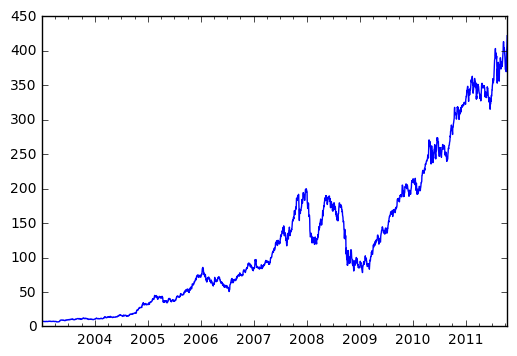

In [203]:
close_px['AAPL'].plot()

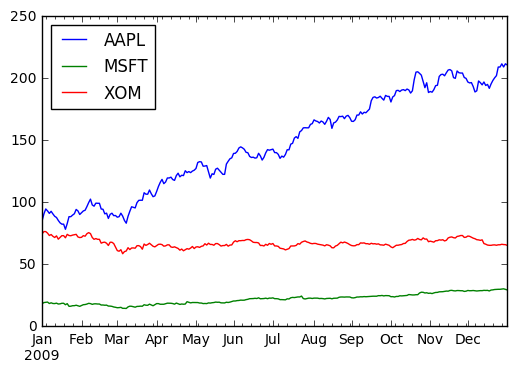

In [204]:
close_px.ix['2009'].plot()

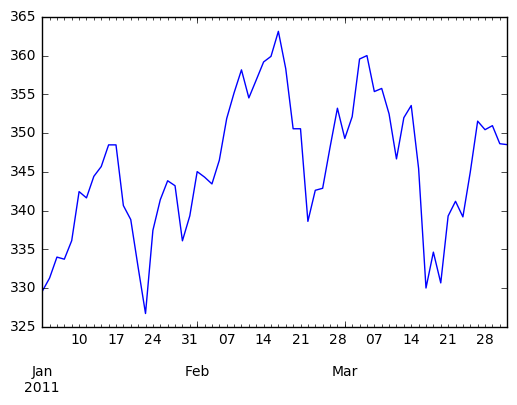

In [205]:
# selecting data by col and inx:
close_px['AAPL'].ix['01-2011':'03-2011'].plot()